In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn import linear_model
import statsmodels.formula.api as smf

In [12]:
df = pd.read_csv('Admission_Predict_Ver1.1.csv')

In [13]:
sns.set(style = "whitegrid", rc = {"figure.figsize": (10, 8)})

In [4]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [5]:
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [18]:
df.drop('Serial No.',axis=1, inplace=True)

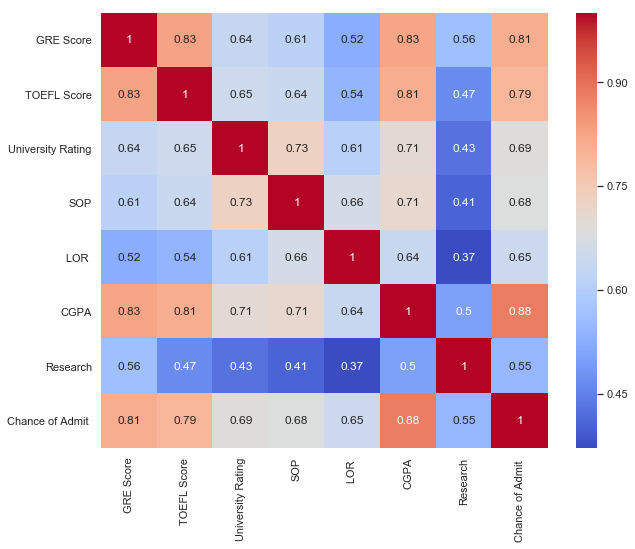

In [19]:
sns.heatmap(df.corr(), cmap='coolwarm', annot=True)

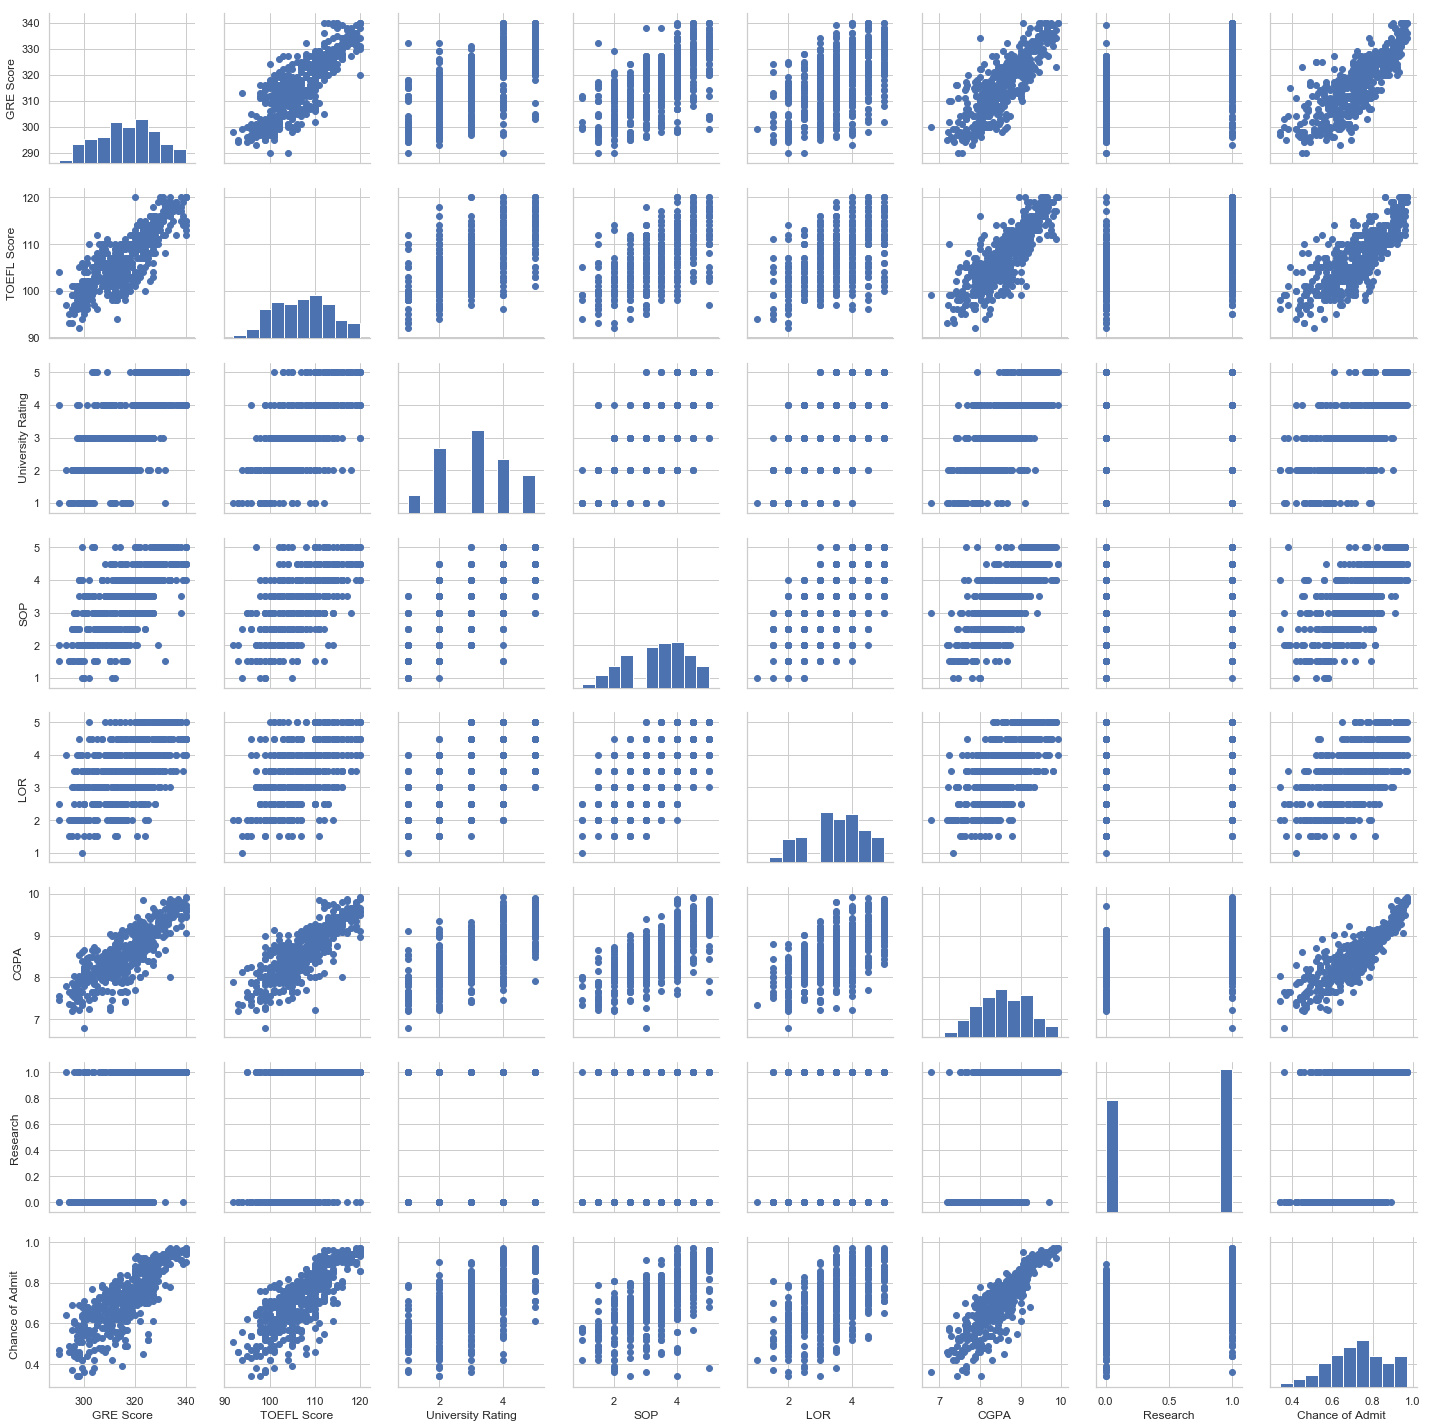

In [20]:
g = sns.PairGrid(df)
g = g.map_diag(plt.hist)
g = g.map_offdiag(plt.scatter)

Data looks pretty clean. The features seem to be pretty normally distributed, except for research, since its binary. Regarding correlations, they are mild to high across the board. Relative to the target variable, the features with the highest correlation are the academic scores, TOEFL, GRE and college GPA.

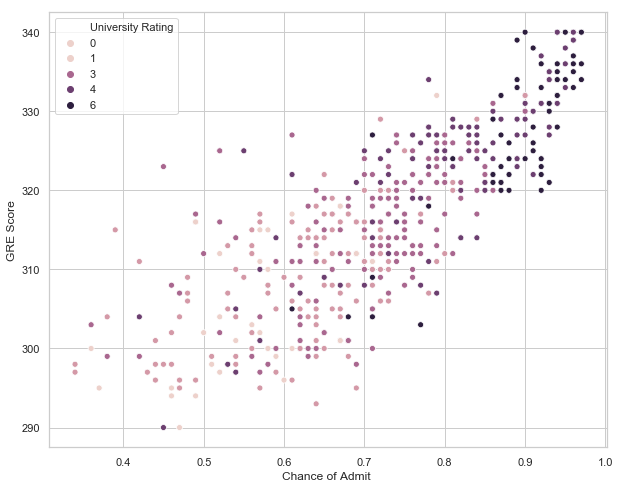

In [35]:
sns.scatterplot(data=df, y='GRE Score', x='Chance of Admit ', hue='University Rating')

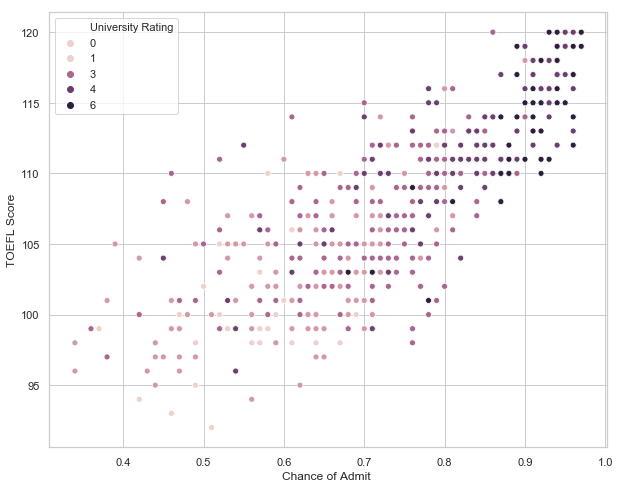

In [36]:
sns.scatterplot(data=df, y='TOEFL Score', x='Chance of Admit ', hue='University Rating')

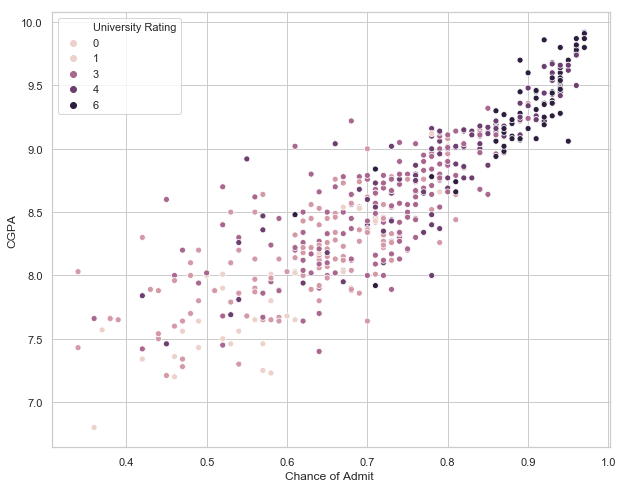

In [42]:
sns.scatterplot(data=df, y='CGPA', x='Chance of Admit ', hue='University Rating')

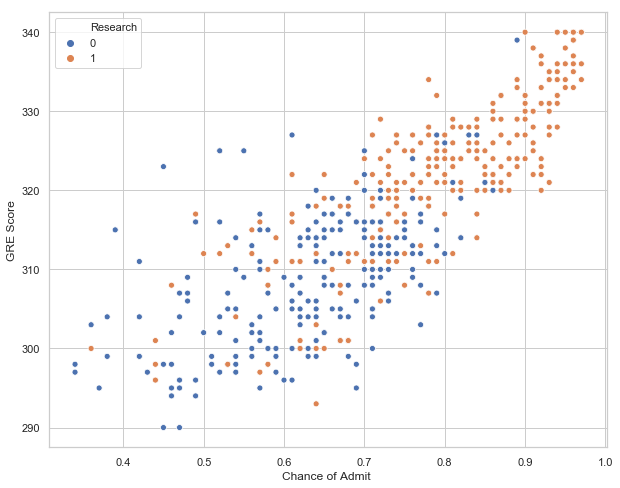

In [44]:
sns.scatterplot(data=df, y='GRE Score', x='Chance of Admit ', hue='Research')

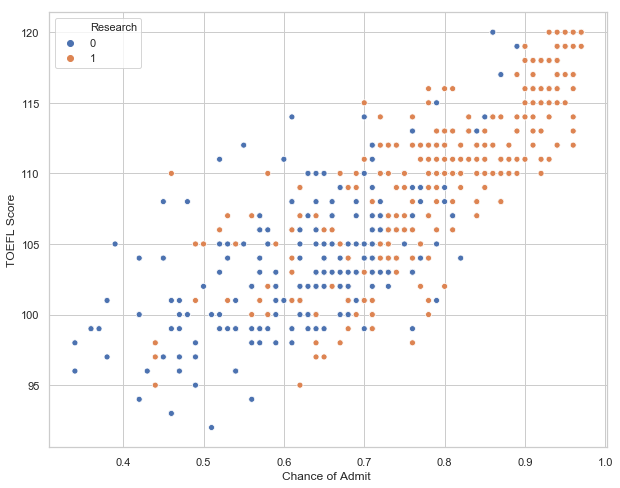

In [46]:
sns.scatterplot(data=df, y='TOEFL Score', x='Chance of Admit ', hue='Research')

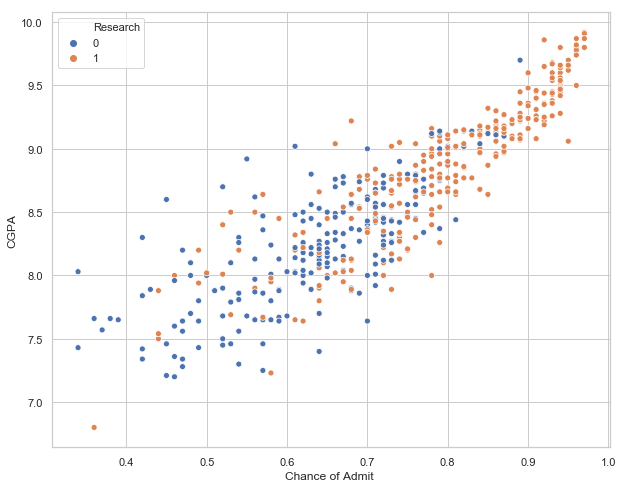

In [52]:
sns.scatterplot(data=df, y='CGPA', x='Chance of Admit ', hue='Research')

OLS Regression

In [49]:
regr = linear_model.LinearRegression()
X = df.drop('Chance of Admit ',axis=1)
Y = df['Chance of Admit ']

In [50]:
regr.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [51]:
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))


Coefficients: 
 [0.00185851 0.00277797 0.00594137 0.00158614 0.01685874 0.11838505
 0.02430748]

Intercept: 
 -1.2757250829969906

R-squared:
0.8219007395178417


Cross Validation

In [53]:
from sklearn.model_selection import cross_val_score
cross_val_score(regr, X, Y, cv=10)

array([0.76390382, 0.63426778, 0.80122649, 0.75336609, 0.87074079,
       0.87588857, 0.8181535 , 0.81939049, 0.91960608, 0.87468016])

Definitely a lot of overfitting going on. Trying to do a train test split to see what happens

In [57]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.4, random_state=20)
print('With 40% Holdout: ' + str(regr.fit(X_train, y_train).score(X_test, y_test)))

With 40% Holdout: 0.7982644359988181


Less accurate...

KNN regression

In [64]:
from sklearn import neighbors
knn = neighbors.KNeighborsRegressor(n_neighbors=5)

knn.fit(X, Y)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=5, p=2,
          weights='uniform')

In [67]:
score = cross_val_score(knn, X, Y, cv=5)
print("Unweighted Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))

Unweighted Accuracy: 0.70 (+/- 0.14)


In [70]:
cross_val_score(knn, X, Y, cv=10)

array([0.67939896, 0.45217421, 0.73330861, 0.70168496, 0.76218952,
       0.64241372, 0.75831506, 0.72447405, 0.74183265, 0.82733848])

KNN weighted regression 

In [69]:
knn_w = neighbors.KNeighborsRegressor(n_neighbors=5, weights='distance')
knn_w.fit(X, Y)
score_w = cross_val_score(knn_w, X, Y, cv=5)
print("Weighted Accuracy: %0.2f (+/- %0.2f)" % (score_w.mean(), score_w.std() * 2))

Weighted Accuracy: 0.70 (+/- 0.15)


In [71]:
cross_val_score(knn_w, X, Y, cv=10)

array([0.67347209, 0.45127181, 0.73922898, 0.69875732, 0.75857514,
       0.65719361, 0.75205067, 0.72416658, 0.75256072, 0.82817594])

KNN regression delivered a less accurate and very overfitted model. The three most correlated features (GRE, TOEFL and CGPA) with the acceptance rate are probably responsible for the overfitting. The OLS model seems like the better choice, even with its flaws